# Clustering Evaluation: Ganglion Cells in the Retina

- **Author**: David Felipe
- **Contact**: https://github.com/davidnfu0
- **Last Modification**: January 24, 2024
- **Description:** In this document, we will evaluate the clusters generated during the training process using multiple methods:

    1. Detailed Visual Inspection: We will conduct a thorough visual inspection of the previously generated clusters. This includes a two-dimensional data visualization (created using PCA and UMAP) and a proximity matrix, which shows how close the elements of our data are to each other.

    2. Metrics: Multiple metrics will be analyzed to assess the clustering performance.

    Following this, we will manually select the data frames and models to continue with the cluster analysis. Active user involvement is crucial in this stage for effective decision-making.

## Introduction

### Importing Libraries


In [1]:
import sys
import pickle
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\David\AppData\Local\Temp\ipykernel_15948\1688518519.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
sys.path.append("../..")

In [3]:
from scripts import load_yaml_config, save_yaml, hide_warnings
from scripts.clustering import (
    plot_clusters,
    proximity_matrix,
    calculate_clustering_metrics,
    plot_clustering_metrics,
    clustering_dict_table,
)

c:\Users\David\miniconda3\envs\ganglion-venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Paths and configuration

In [4]:
plt.style.use("seaborn-v0_8-darkgrid")

In [5]:
configPath = "../../config/"
config = load_yaml_config(configPath + "general_config.yml")

### Loading the Data

In [6]:
with open(
    "../../" + config["paths"]["data_cache"]["clustering"]["DFS_NORM"], "rb"
) as file:
    dfs_norm = pickle.load(file)
with open(
    "../../" + config["paths"]["data_cache"]["clustering"]["DFS_PCA_2D"], "rb"
) as file:
    dfs_pca_2d = pickle.load(file)
with open(
    "../../" + config["paths"]["data_cache"]["clustering"]["PCAS_2D"], "rb"
) as file:
    pcas_2d = pickle.load(file)
with open(
    "../../" + config["paths"]["data_cache"]["clustering"]["DFS_UMAP_2D"], "rb"
) as file:
    dfs_umap_2d = pickle.load(file)
with open(
    "../../" + config["paths"]["data_cache"]["clustering"]["UMAPS_2D"], "rb"
) as file:
    umaps_2d = pickle.load(file)
with open(
    "../../" + config["paths"]["data_cache"]["clustering"]["MODELS"], "rb"
) as file:
    clustering_models = pickle.load(file)
with open(
    "../../" + config["paths"]["data_cache"]["clustering"]["CENTROIDS"], "rb"
) as file:
    clustering_centroids = pickle.load(file)
with open(
    "../../" + config["paths"]["data_cache"]["clustering"]["PREDS"], "rb"
) as file:
    clustering_pred = pickle.load(file)

## Visual Evaluation

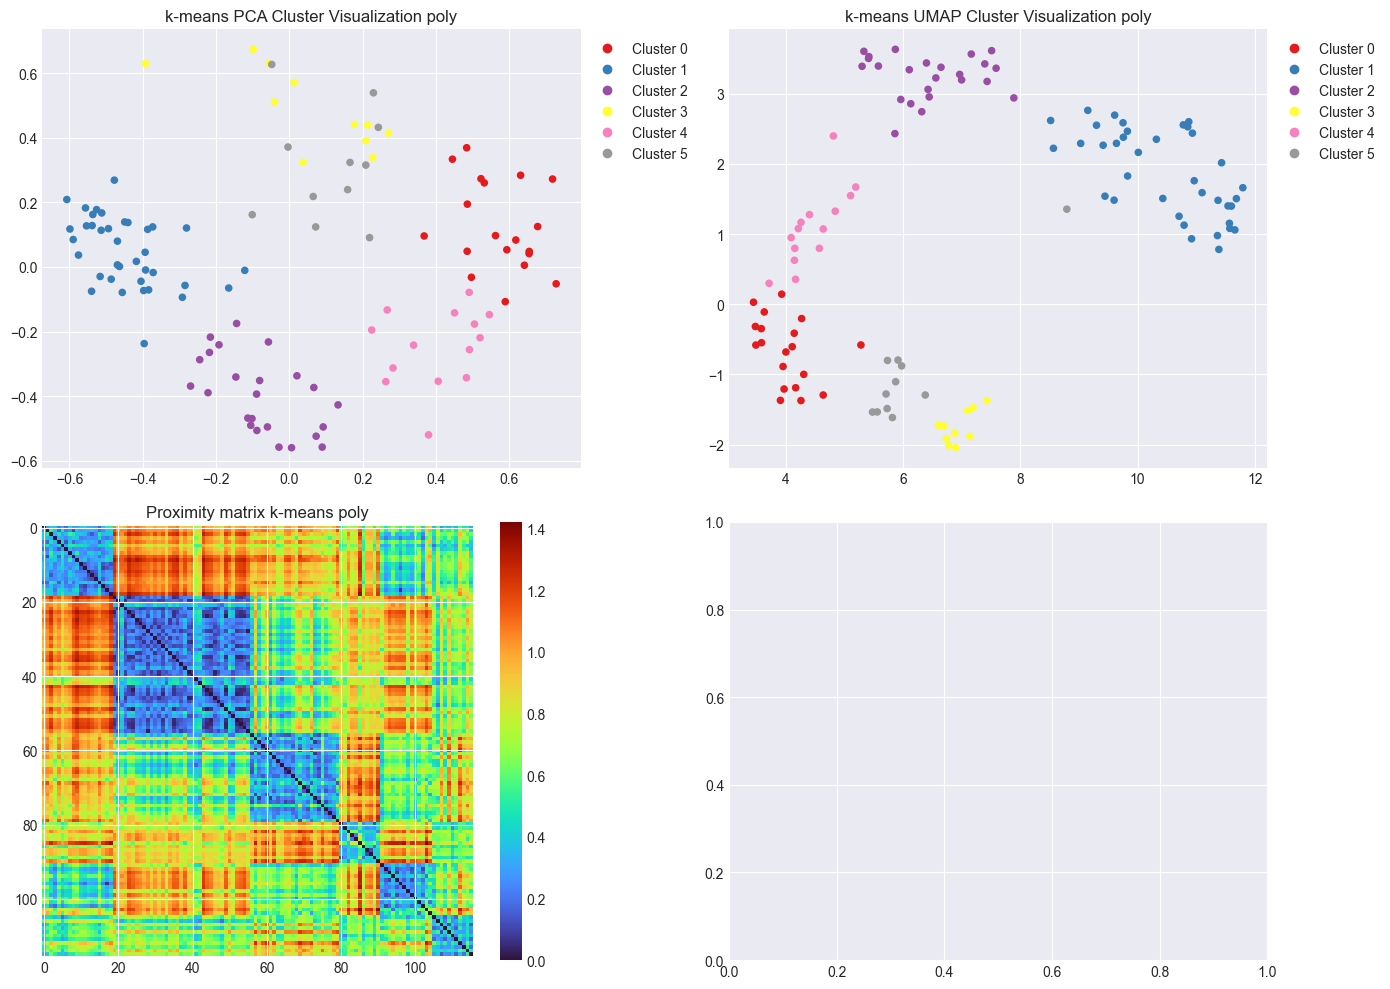

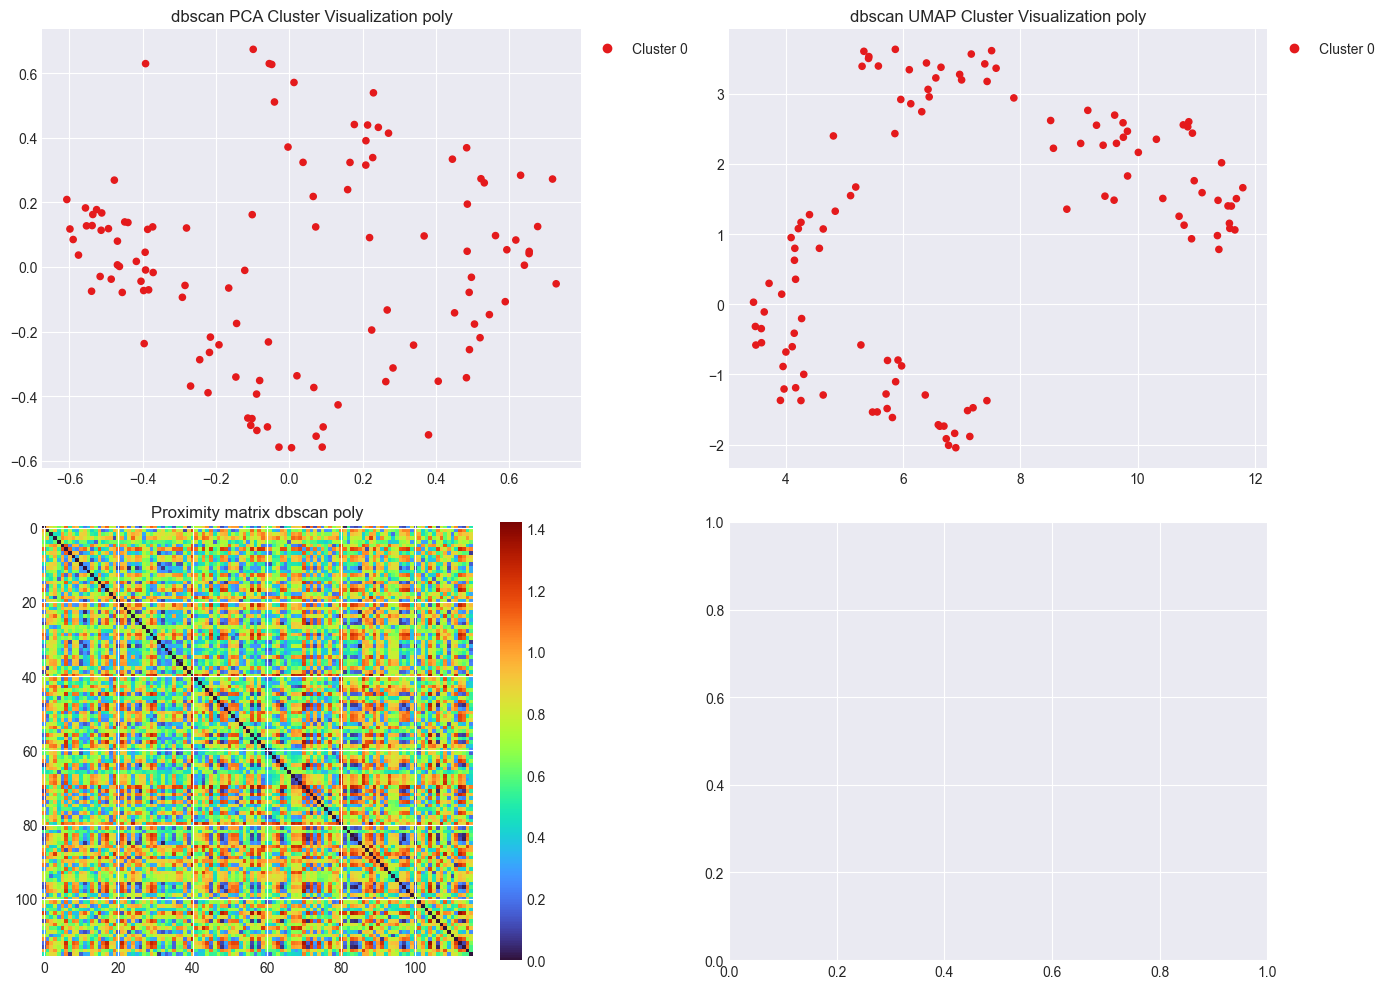

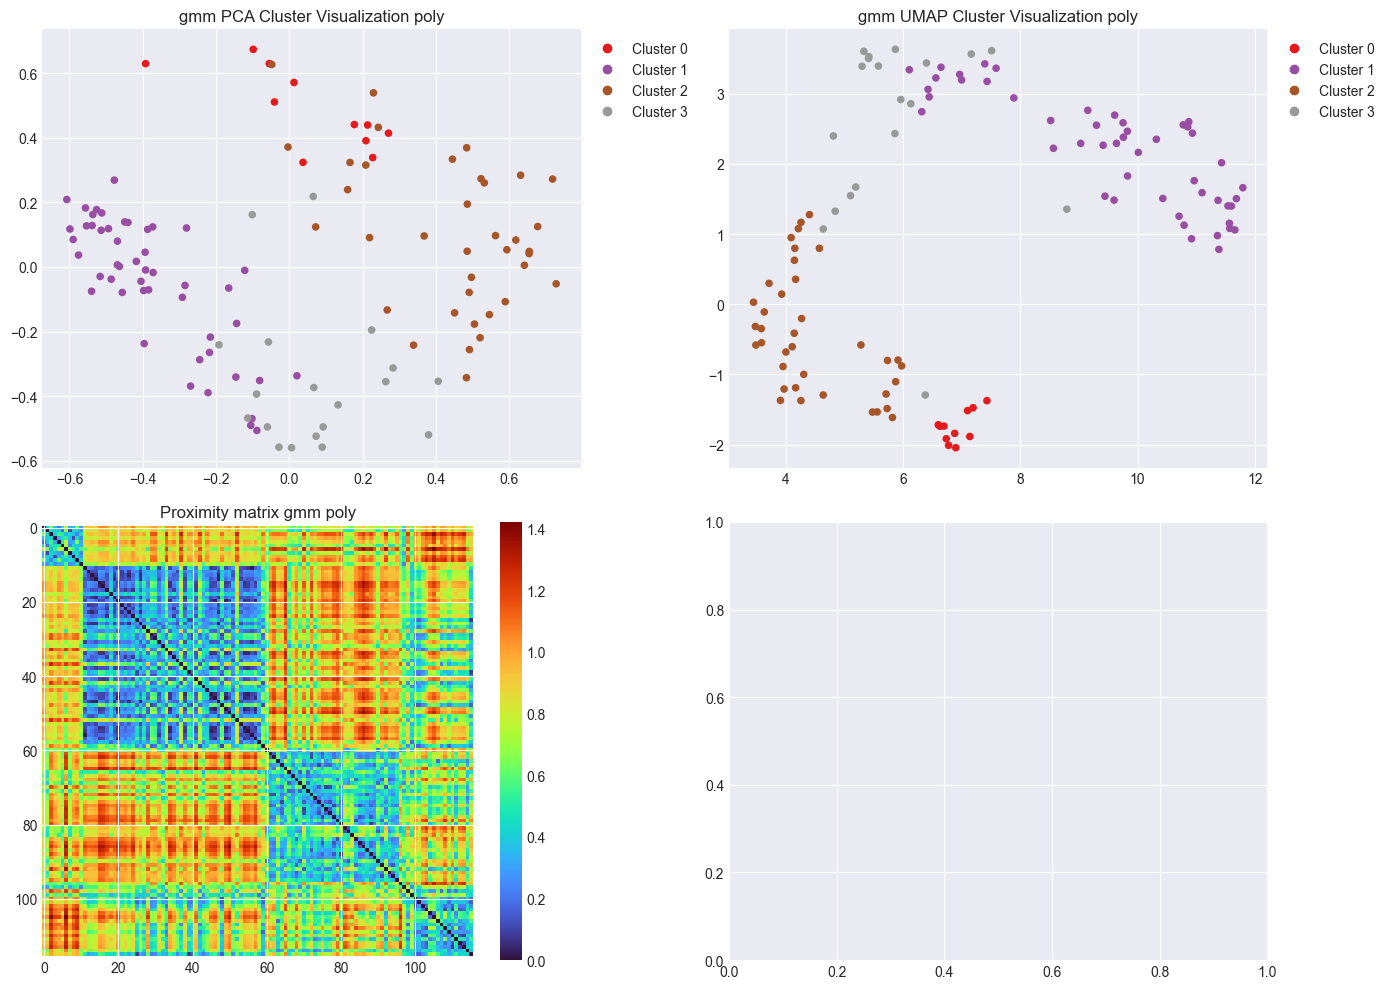

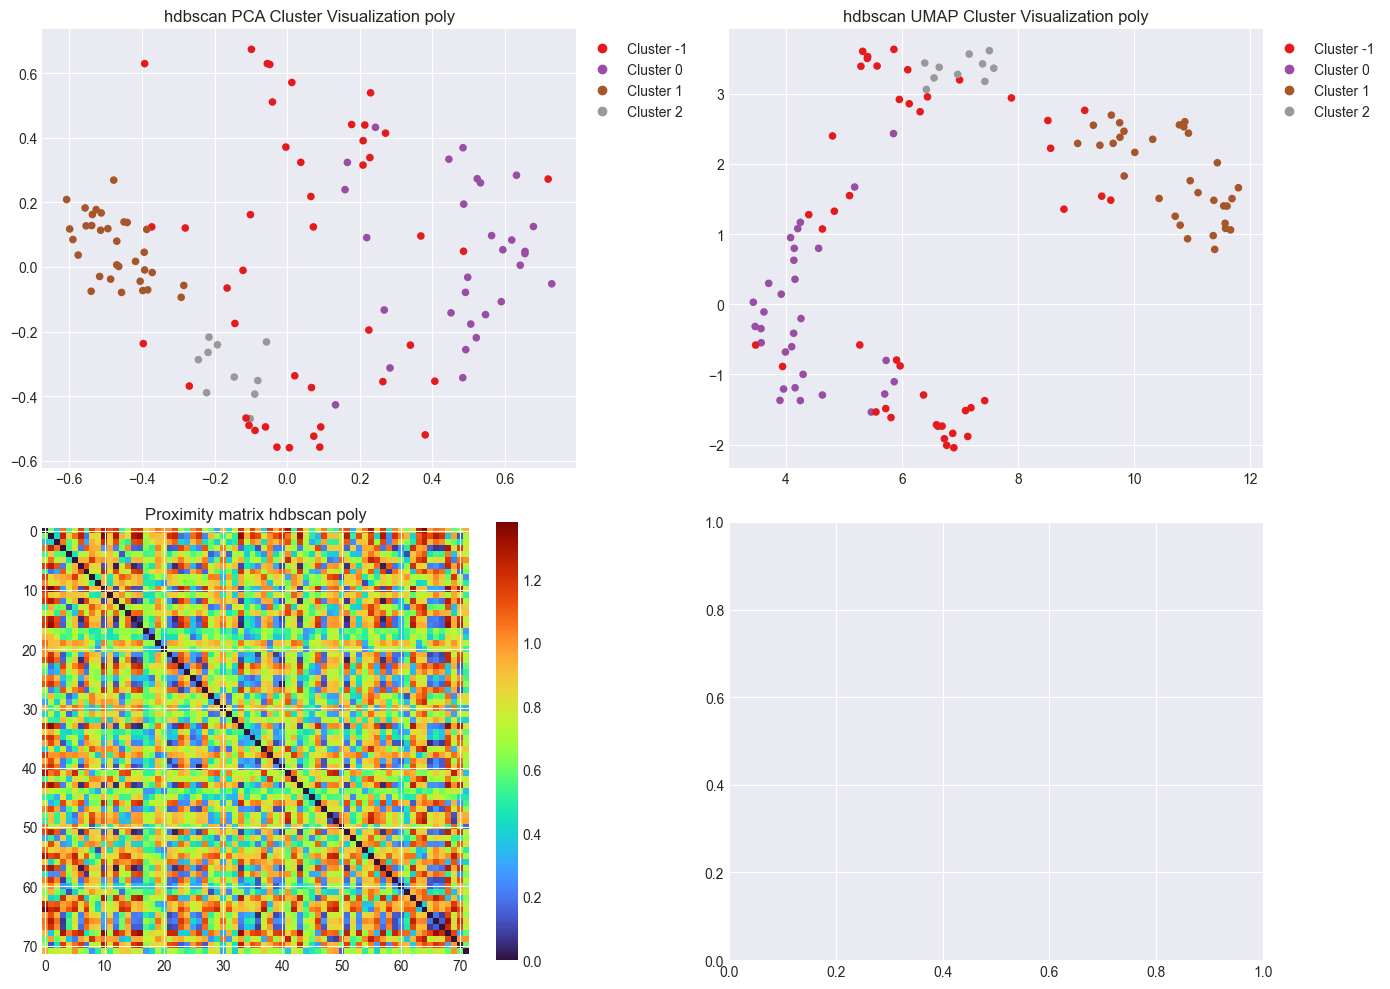

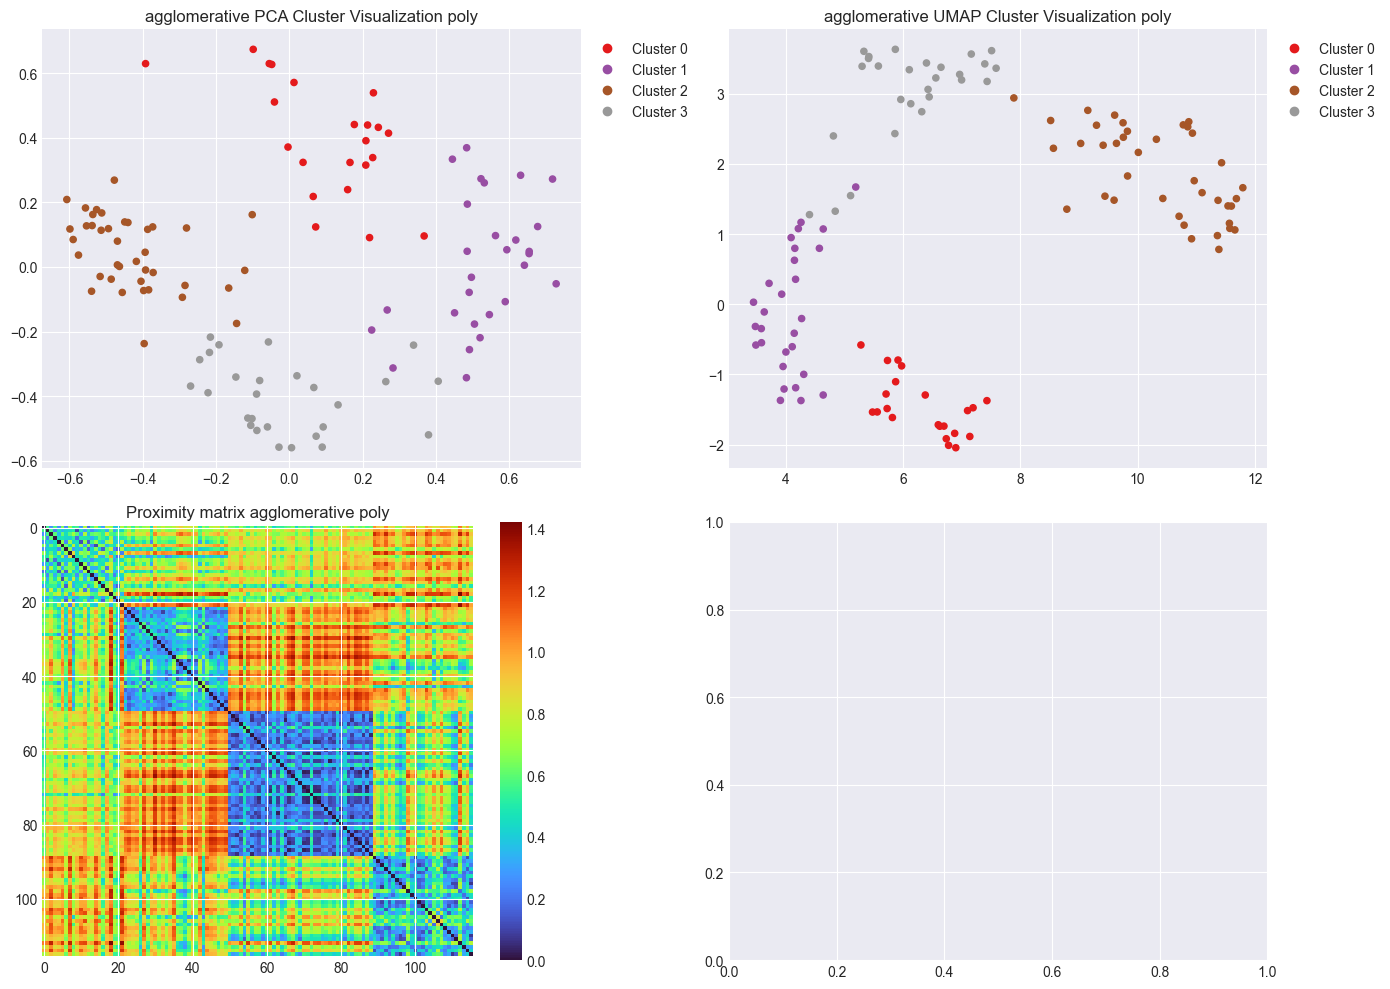

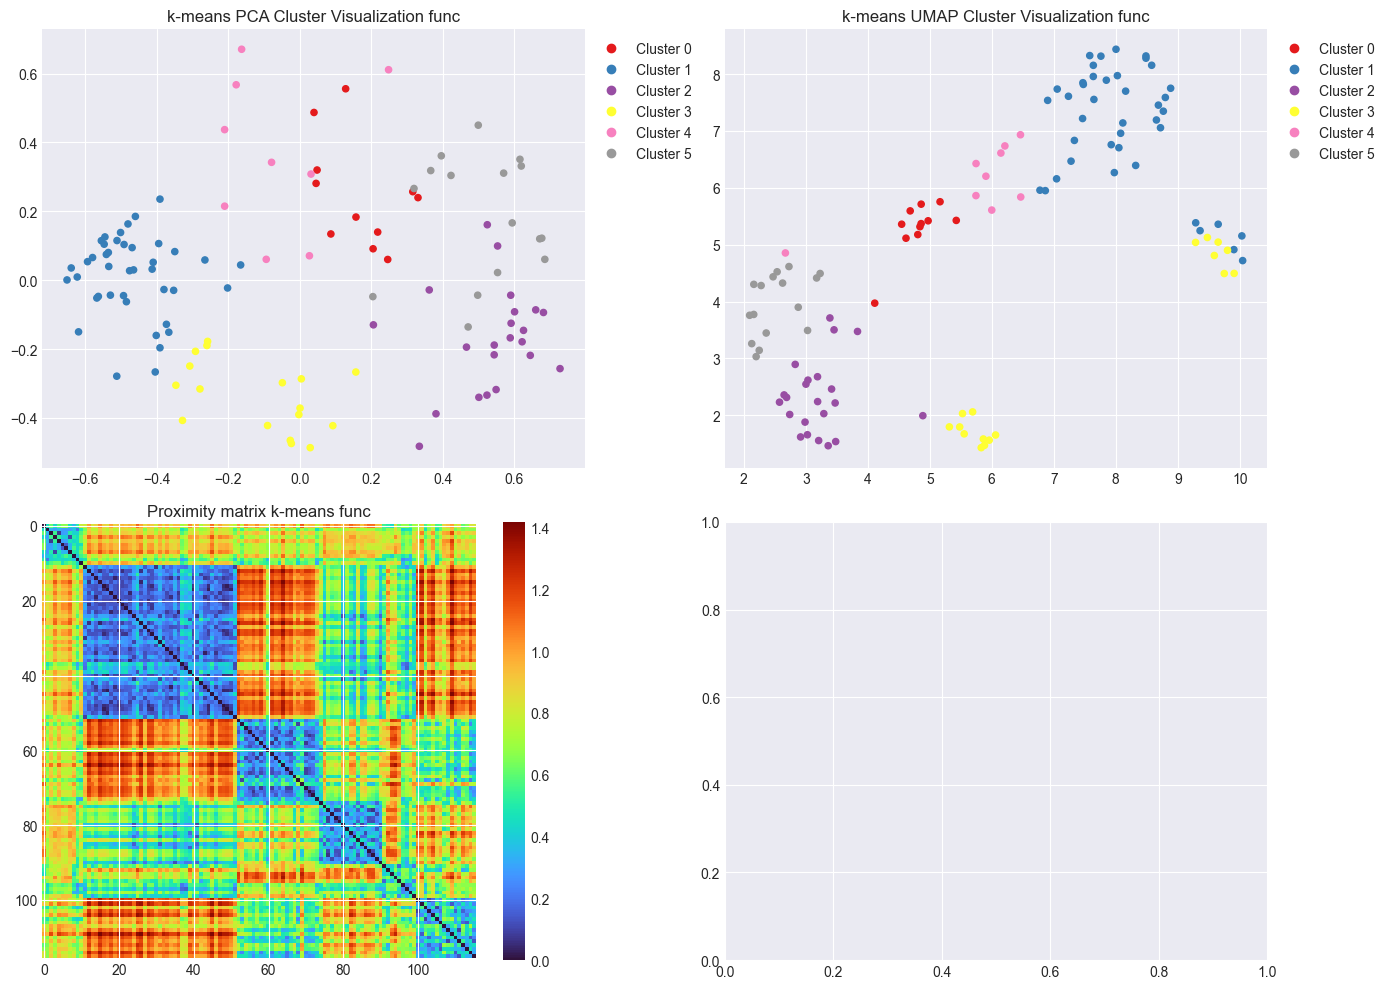

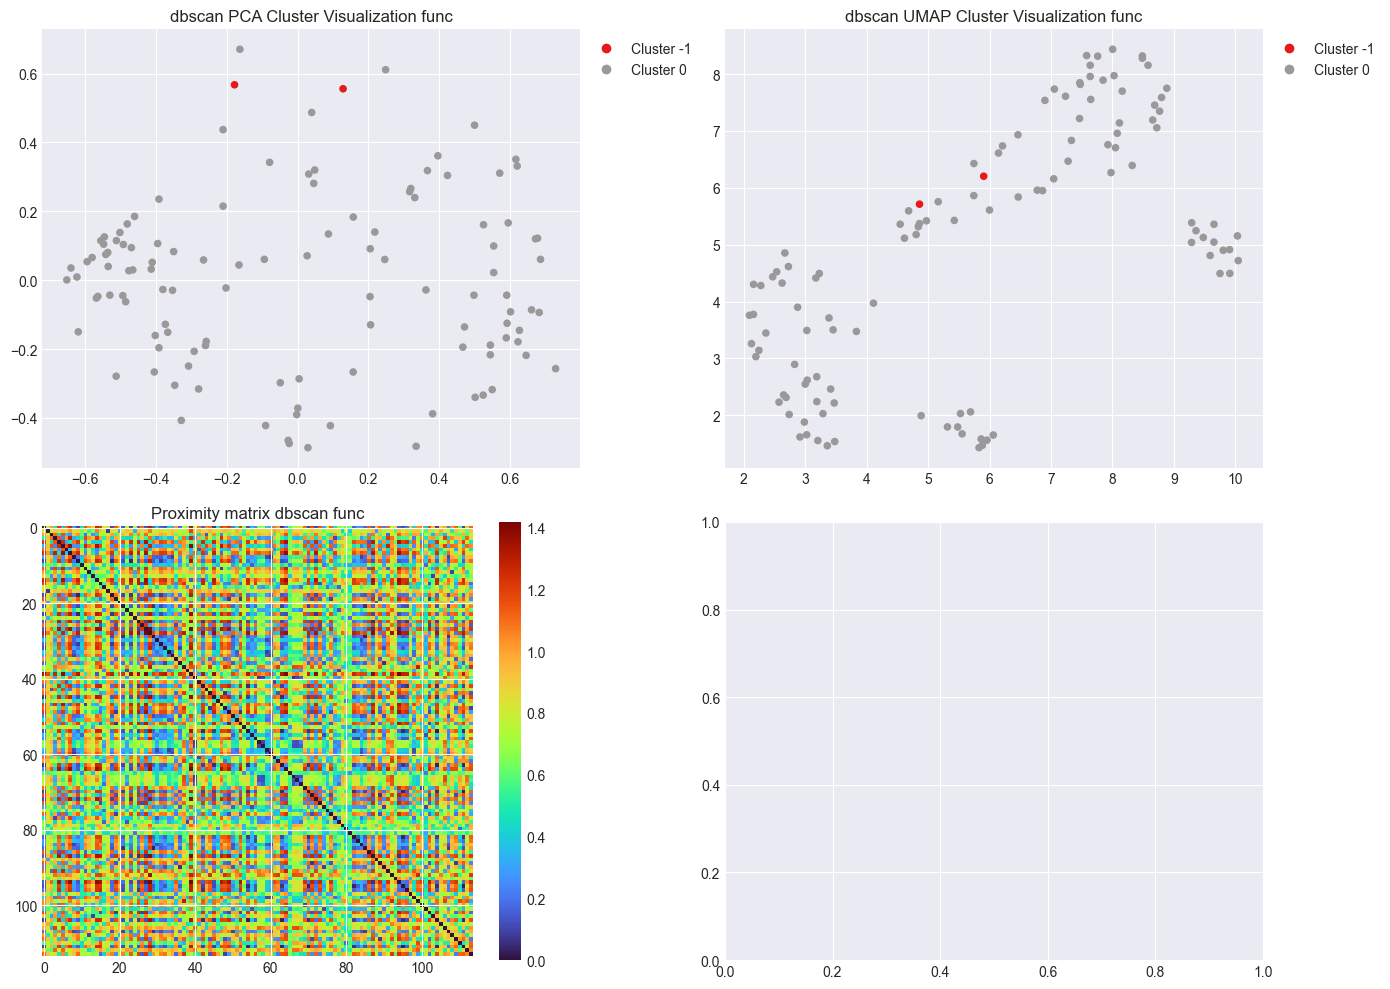

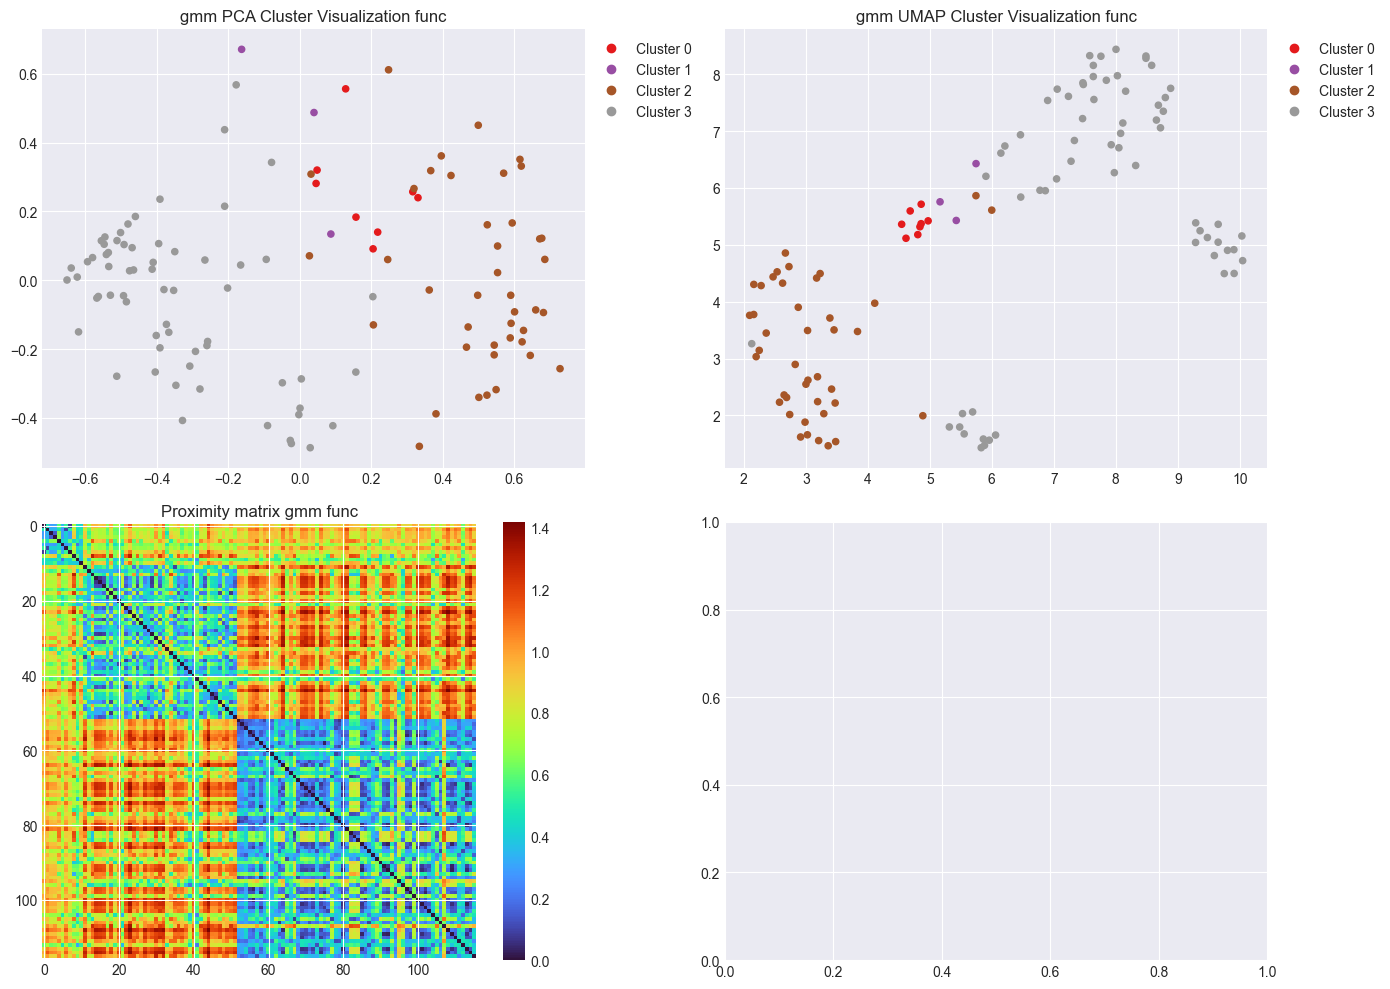

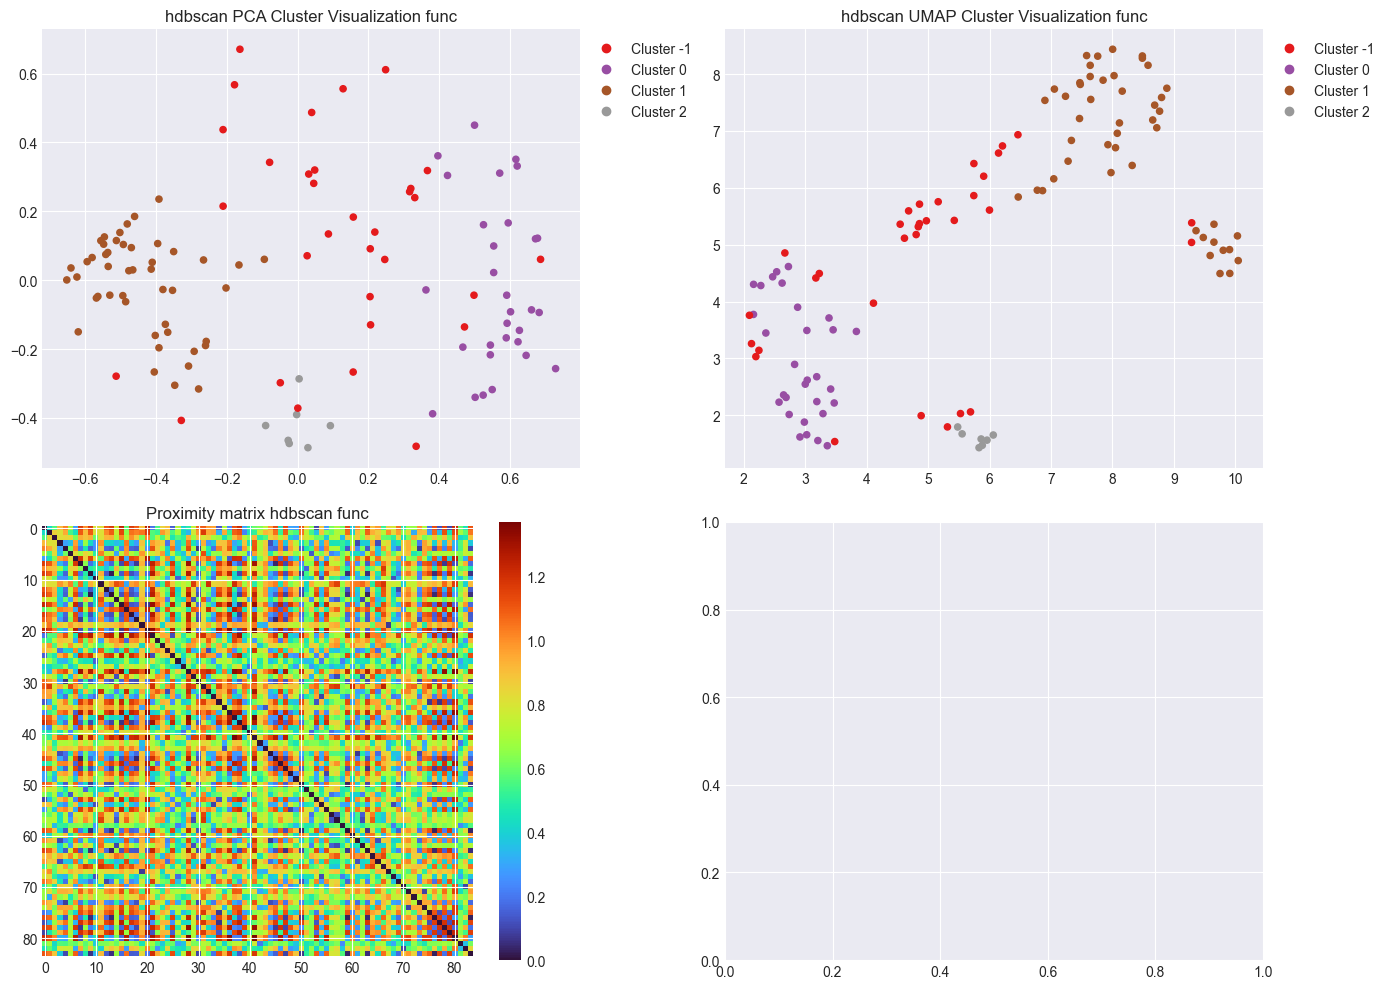

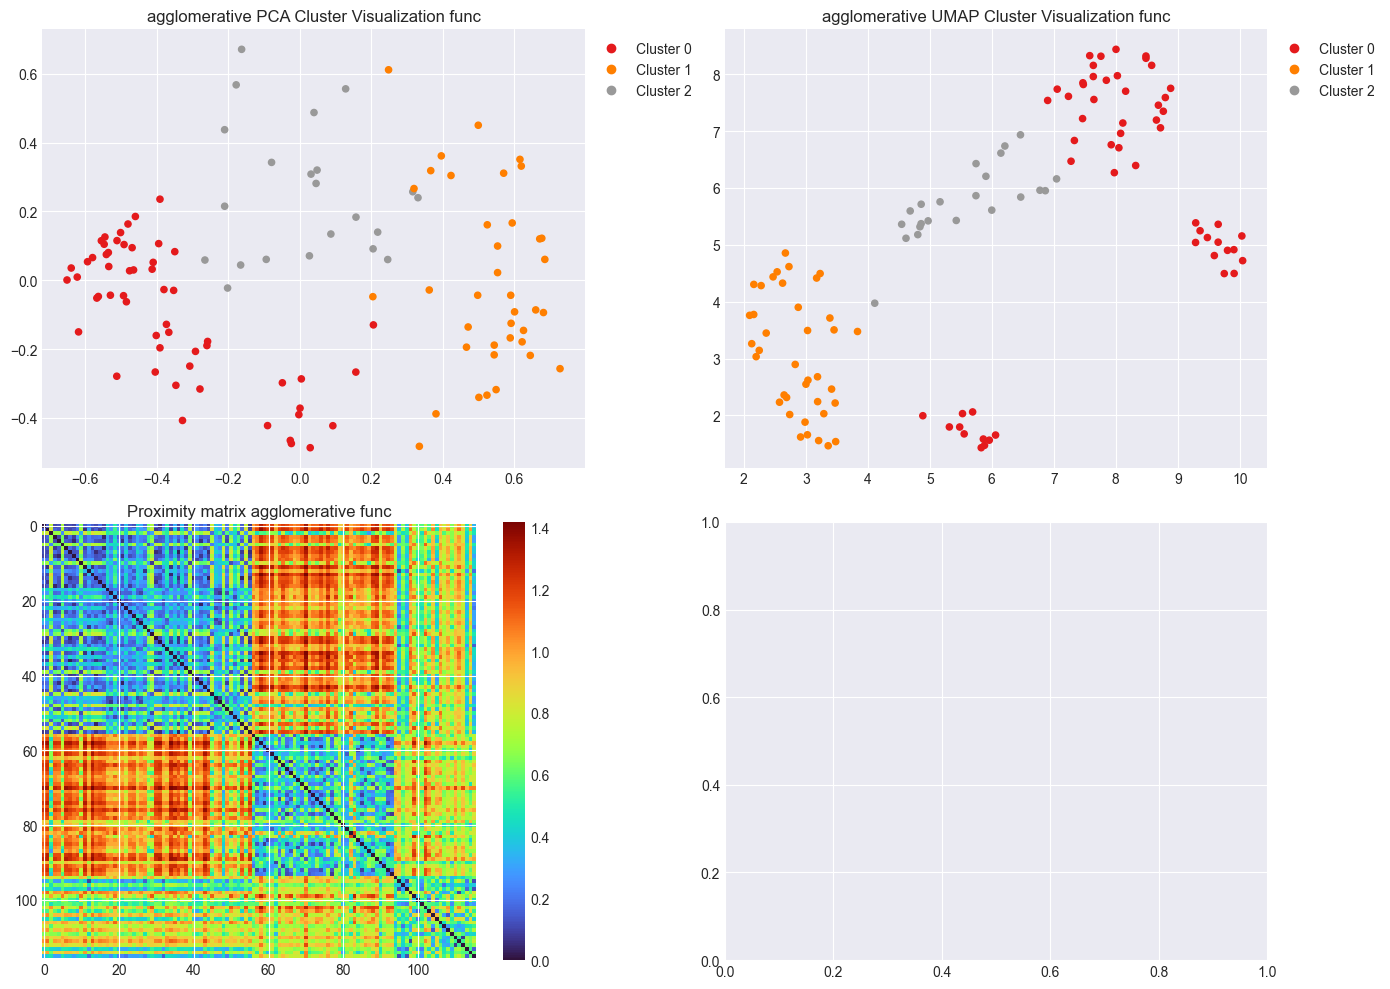

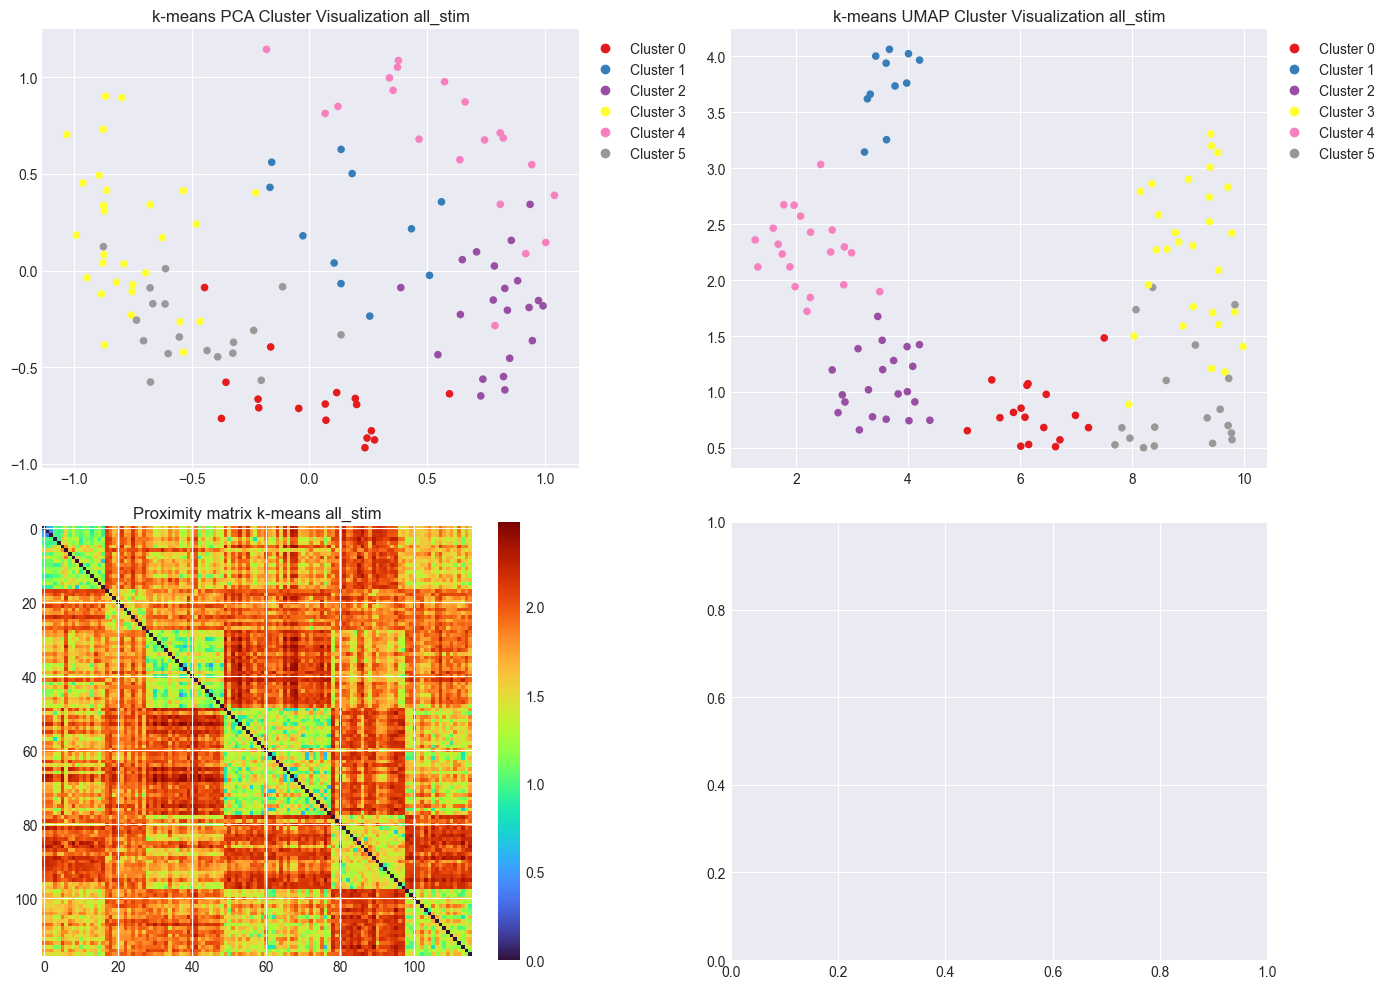

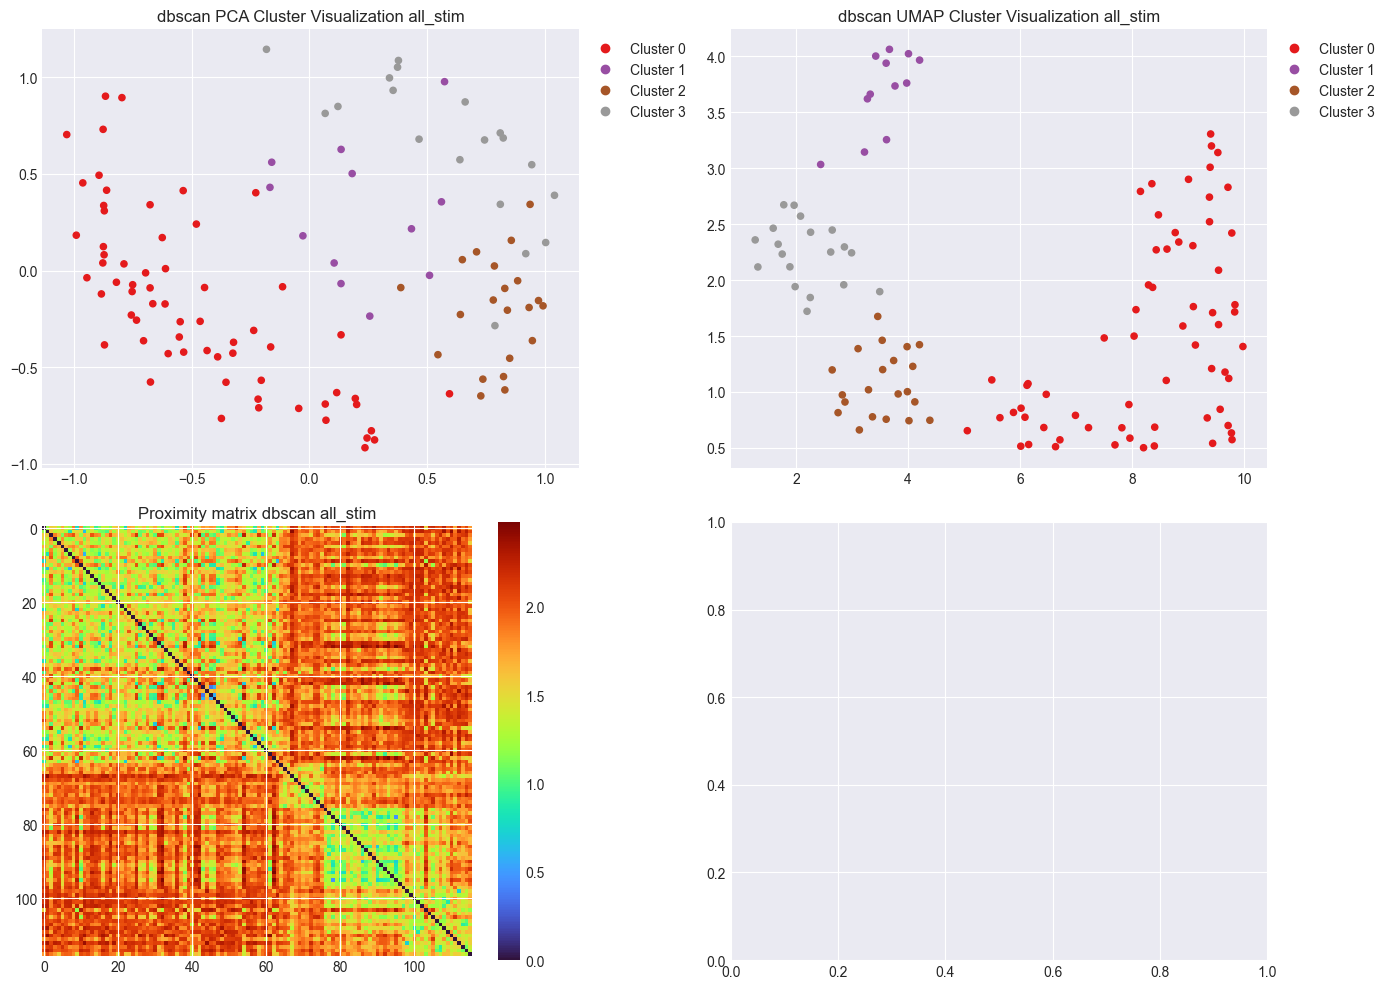

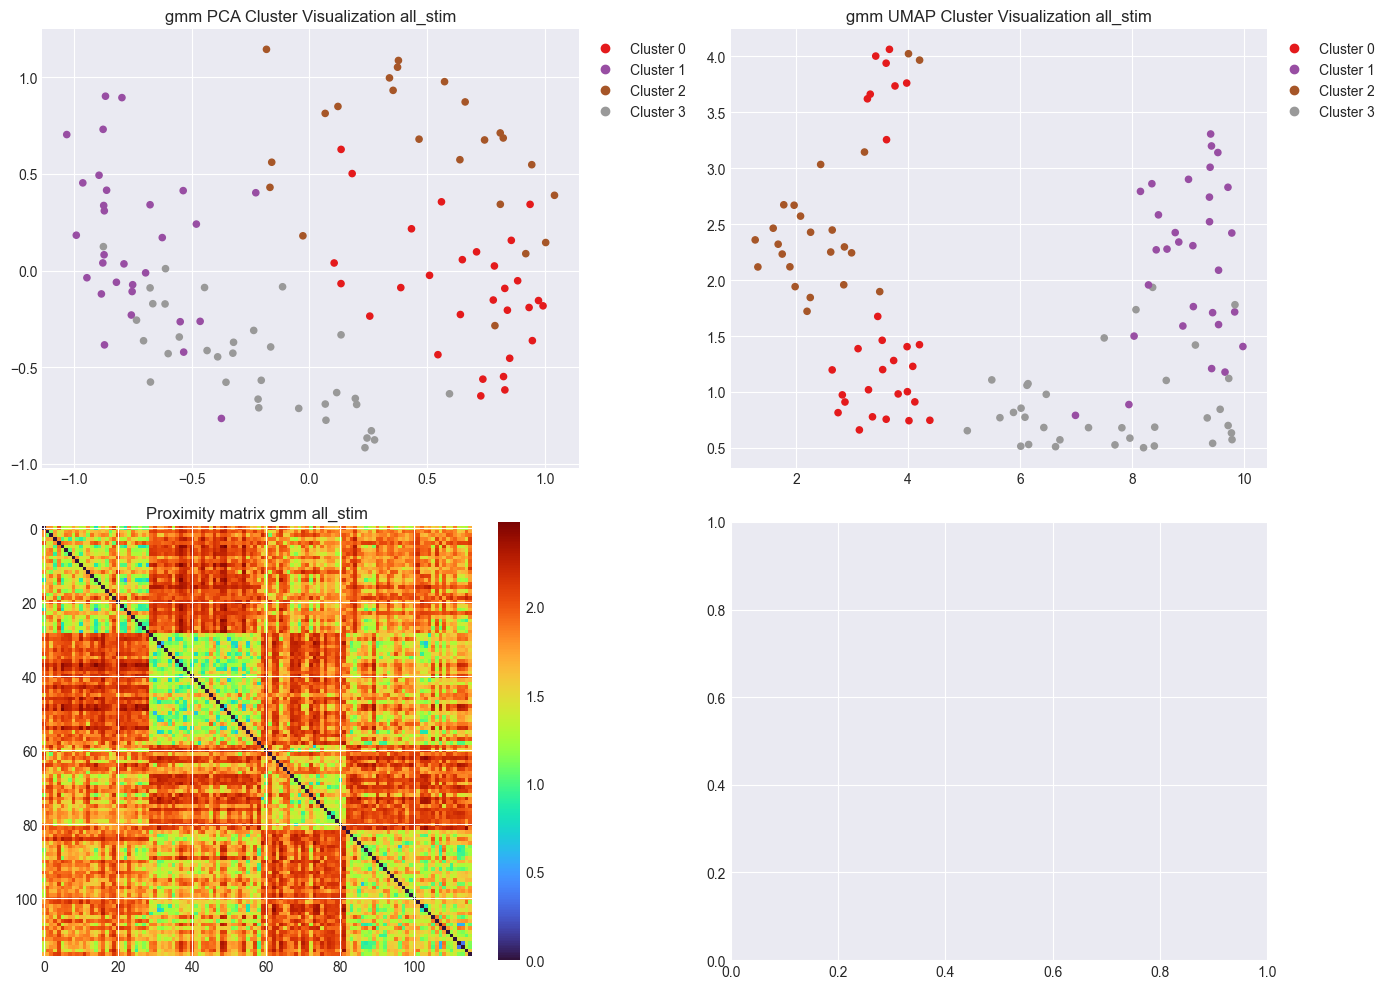

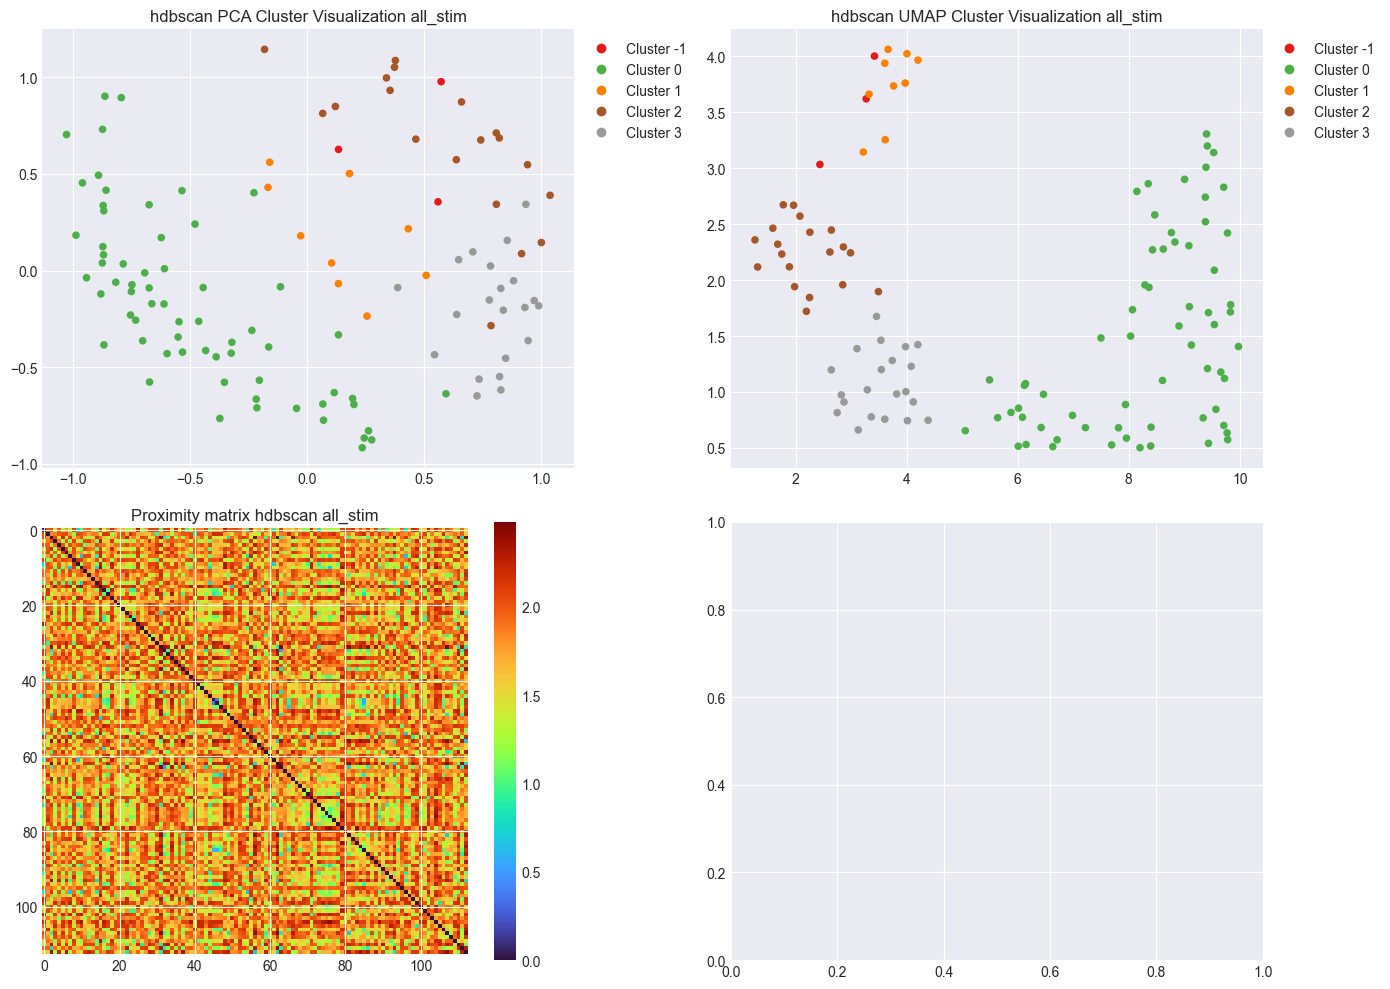

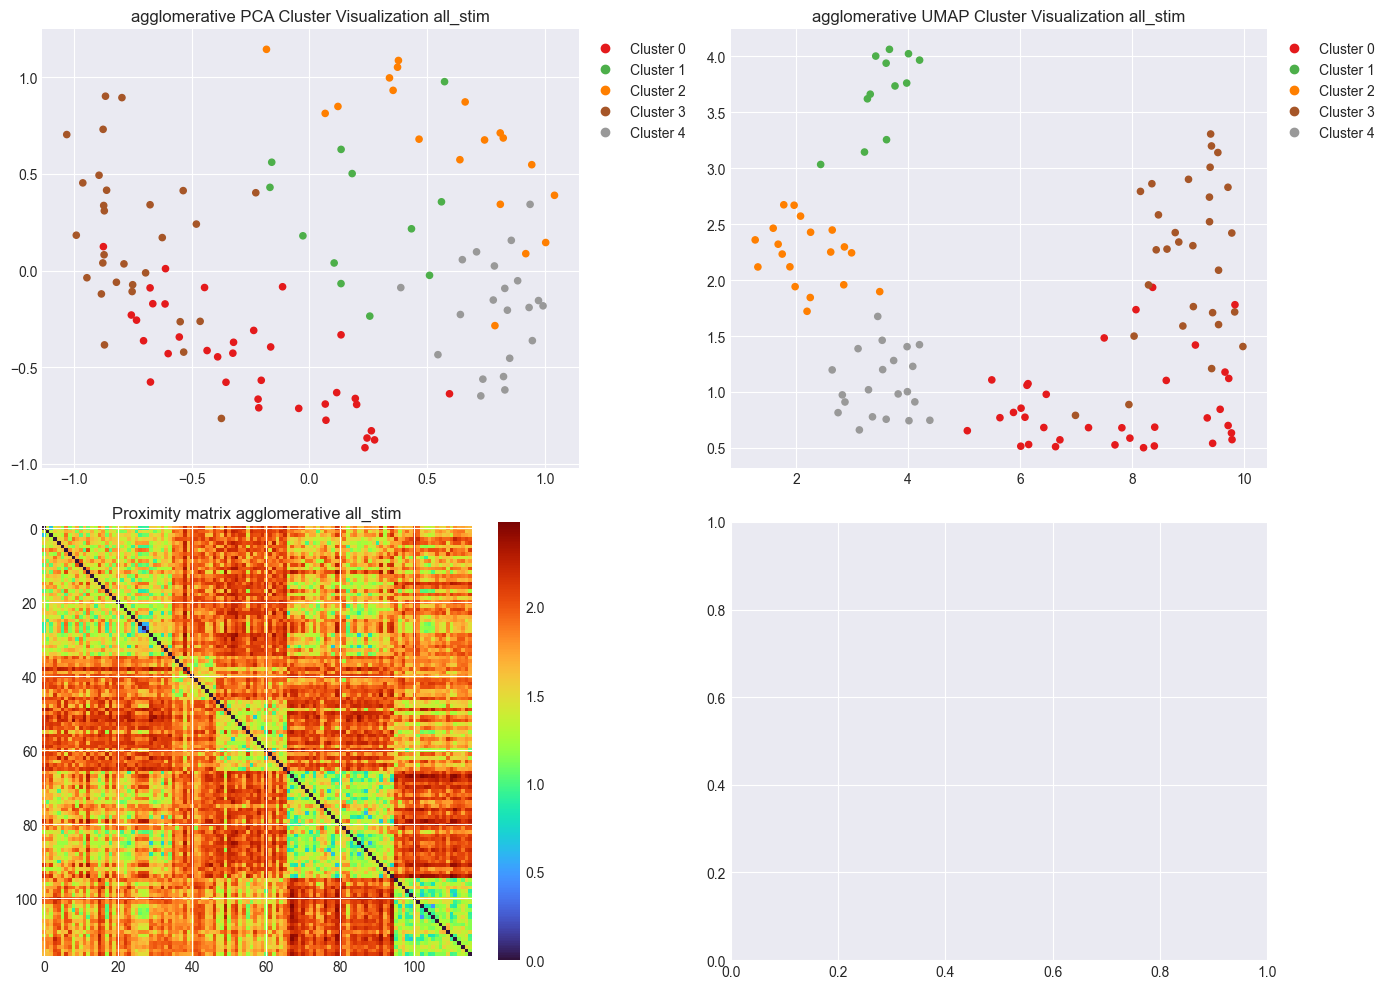

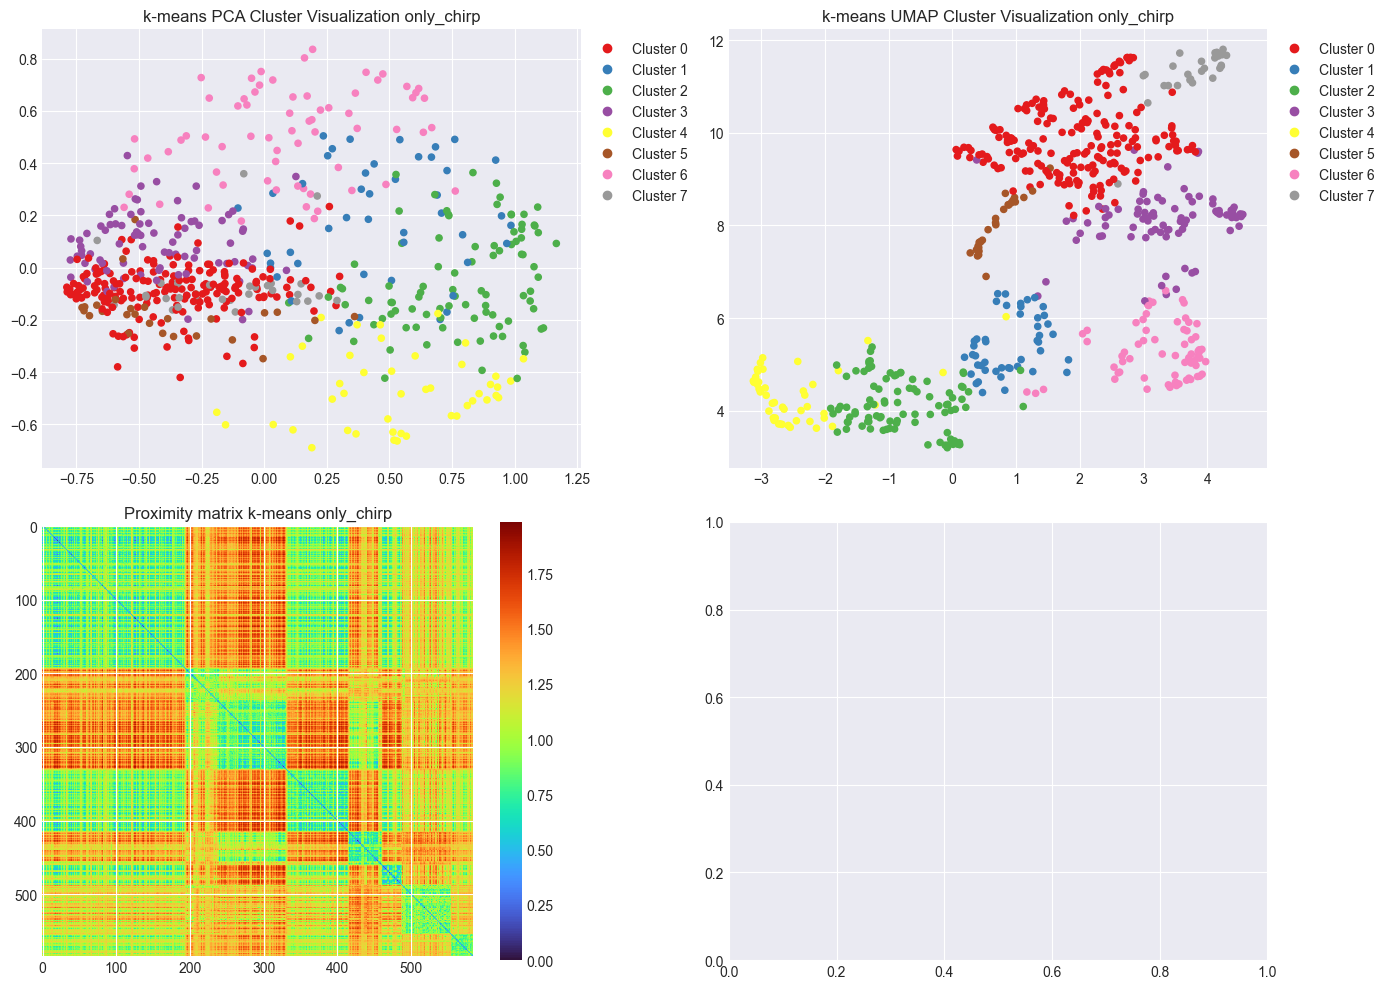

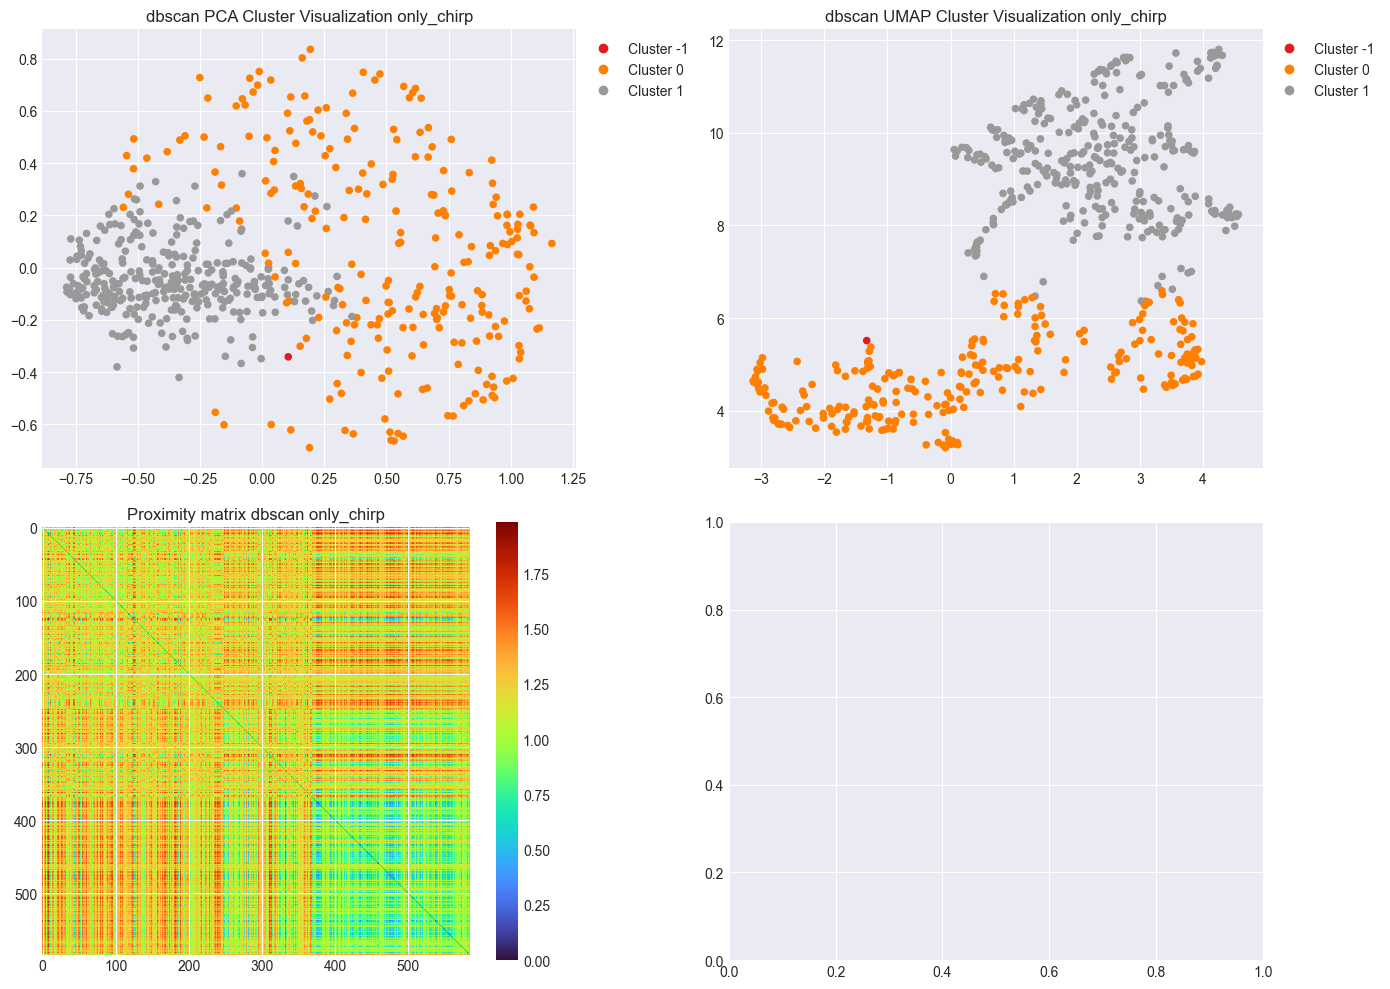

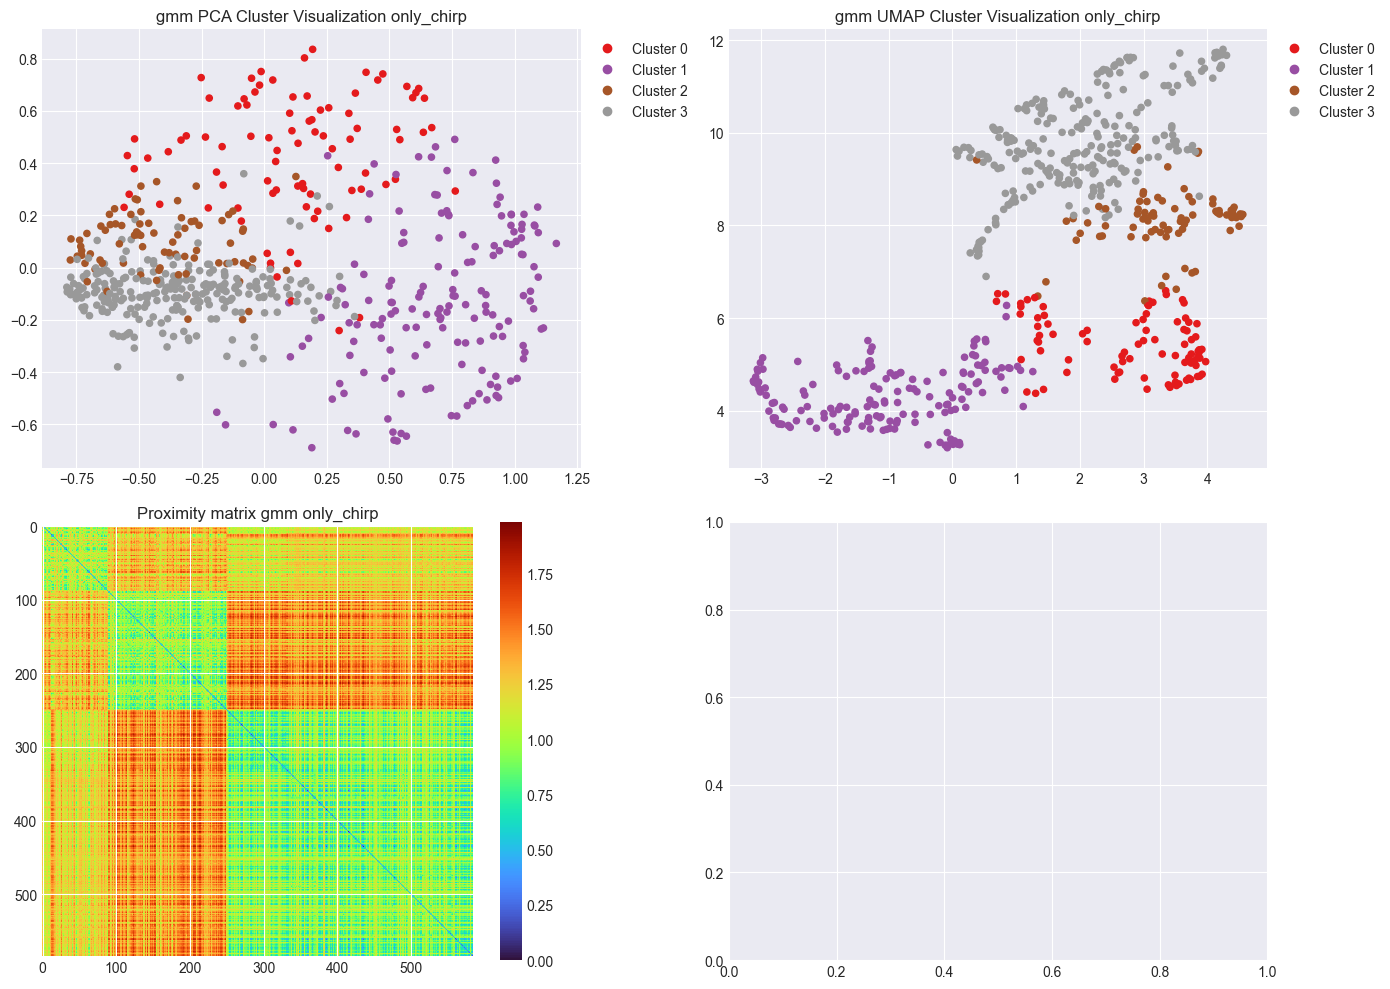

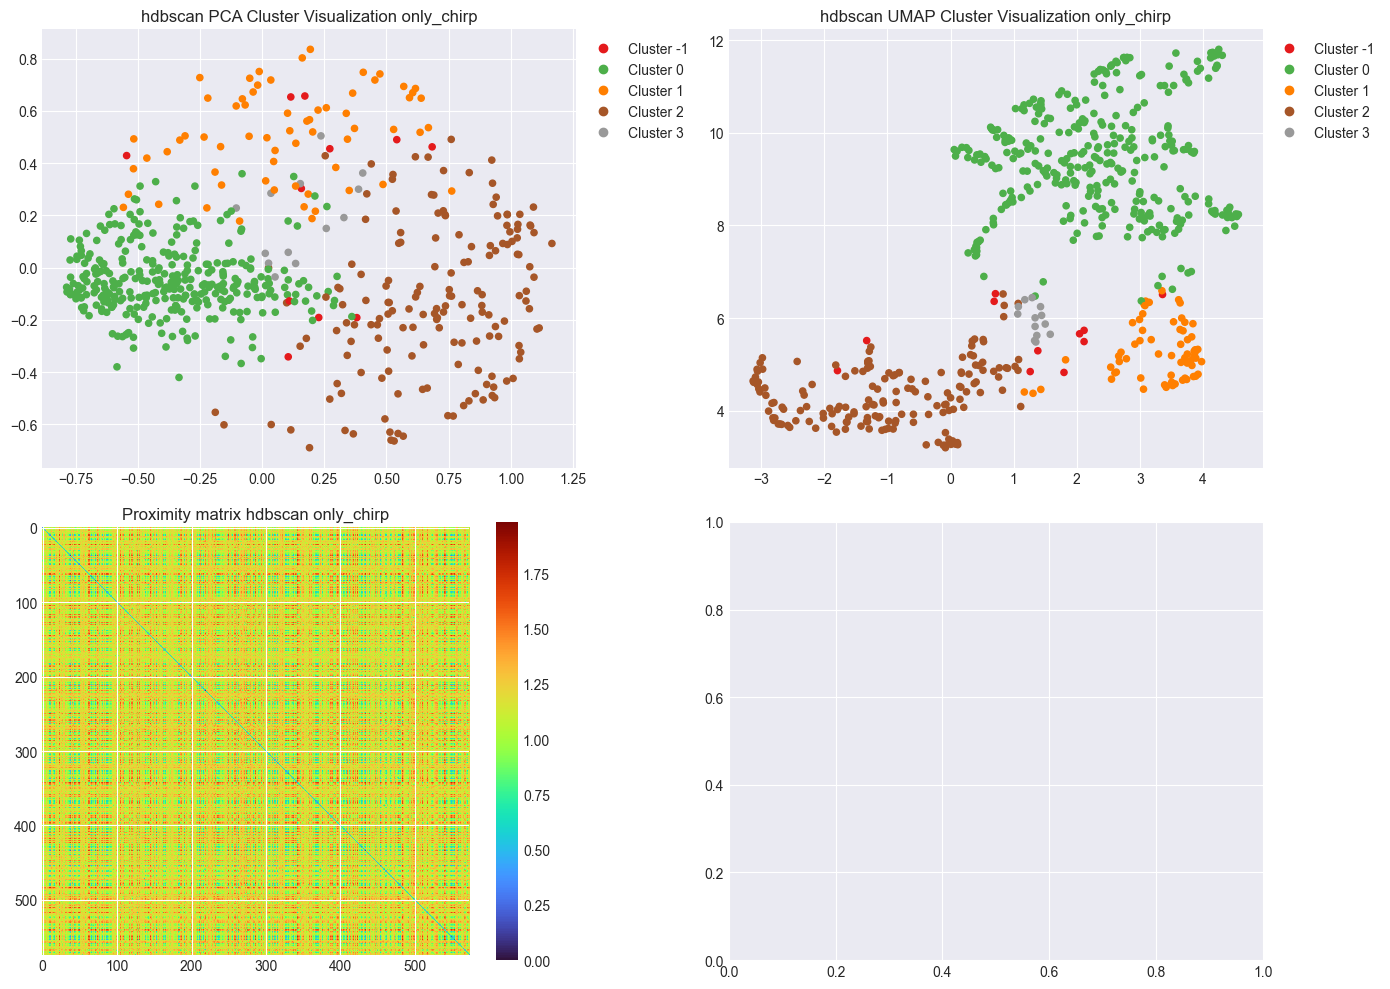

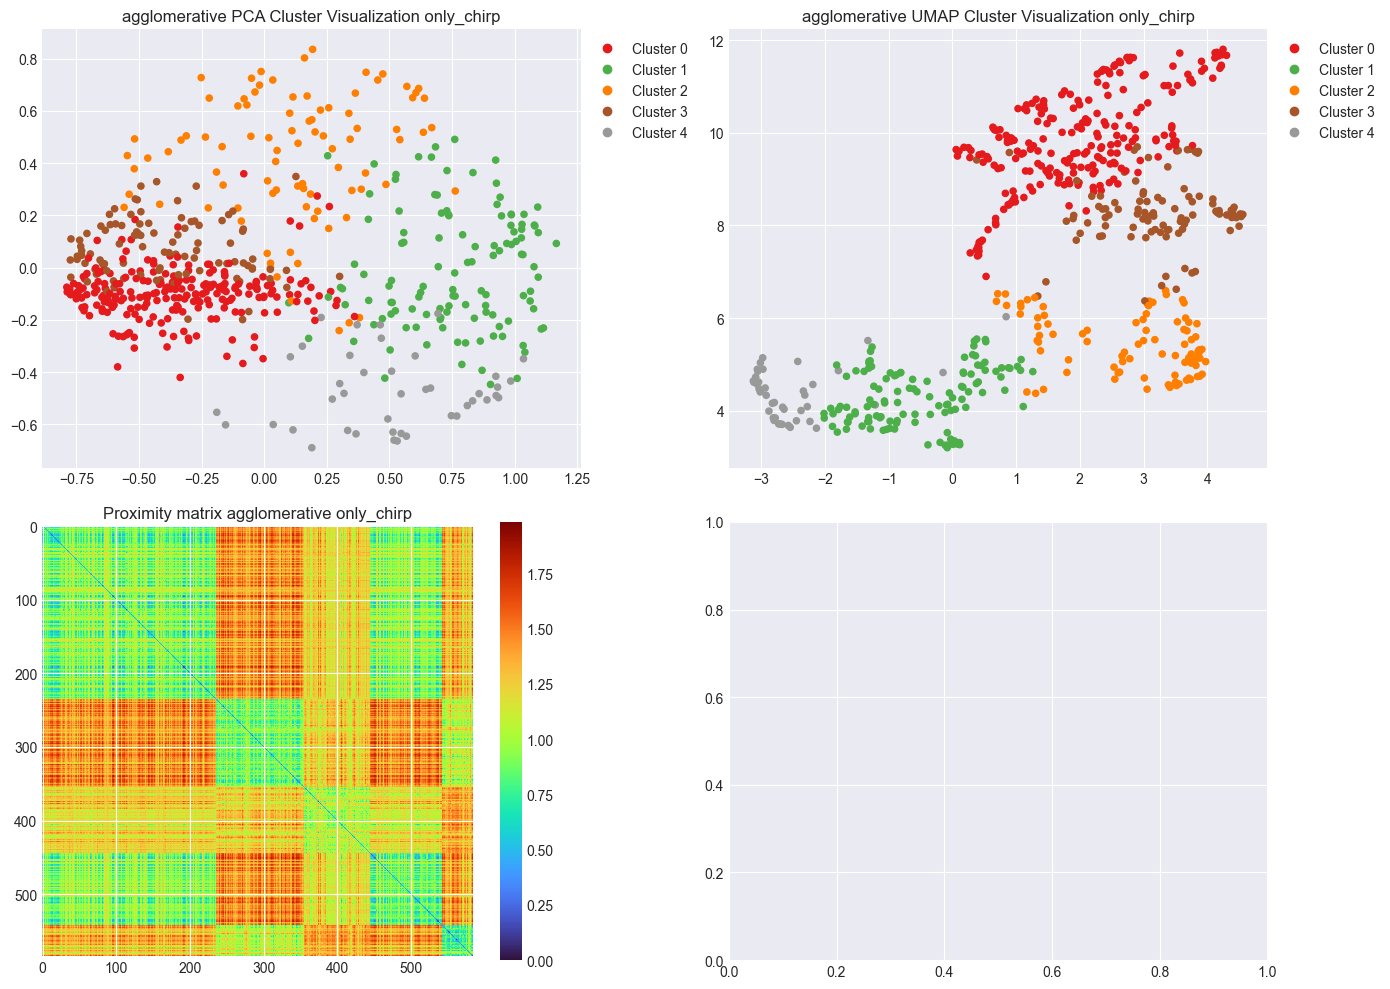

In [7]:
hide_warnings()
for df_name in dfs_norm.keys():
    for model in clustering_pred.keys():
        columns = 2
        rows = 2
        figure_size = (columns * 7, rows * 5)
        _, axs = plt.subplots(ncols=columns, nrows=rows, figsize=figure_size)
        if model == "kmeans":
            centroids = clustering_centroids[model][df_name]
        else:
            centroids = None
        plot_clusters(
            title=f"{model} PCA Cluster Visualization {df_name}",
            axs=axs,
            model_labels=clustering_pred[model][df_name],
            X=dfs_pca_2d[df_name],
            subplot_coords=(0, 0),
            point_size=20,
            centroids=centroids,
            pca=pcas_2d[df_name],
        )
        plot_clusters(
            title=f"{model} UMAP Cluster Visualization {df_name}",
            axs=axs,
            model_labels=clustering_pred[model][df_name],
            X=dfs_umap_2d[df_name],
            subplot_coords=(0, 1),
            point_size=20,
            centroids=centroids,
            pca=None,
            umap=umaps_2d[df_name],
        )
        proximity_matrix(
            title=f"Proximity matrix {model} {df_name}",
            axs=axs,
            model_labels=clustering_pred[model][df_name],
            X=dfs_norm[df_name].to_numpy(),
            subplot_coords=(1, 0),
        )
        plt.tight_layout()
        plt.show()

### Metrics
This section outlines various metrics used for evaluating the performance and effectiveness of the clustering algorithms. Detailed explanations of each metric are provided below, along with links to Wikipedia for further reading:

1. **Silhouette Score**: This metric evaluates how well each data point in a cluster is matched to its own cluster compared to other clusters. It is calculated using both the mean intra-cluster distance (average distance between each point within the same cluster) and the mean nearest-cluster distance (average distance to the points of the nearest cluster that the data point is not a part of). The Silhouette Score ranges from -1 to +1, where a high value suggests that the data point is well matched to its own cluster and distinct from other clusters. This score is particularly useful to determine the separation distance between the resulting clusters. [More on Silhouette Score](https://en.wikipedia.org/wiki/Silhouette_(clustering))

2. **Calinski-Harabasz Index**: Also known as the Variance Ratio Criterion, this index is a method for evaluating the quality of a clustering algorithm. It is defined as the ratio of the sum of between-cluster dispersion (the sum of squared distances between cluster centers and the overall data center) and within-cluster dispersion (the sum of squared distances between data points and their respective cluster centers). Higher values of this index indicate that the clusters are dense and well-separated, which is generally desired in clustering. [More on Calinski-Harabasz Index](https://en.wikipedia.org/wiki/Calinski-Harabasz_index)

3. **Davies-Bouldin Index**: This index is an internal evaluation scheme where lower values indicate better clustering. It's calculated by measuring the average 'similarity' between each cluster and its most similar one, where similarity is a measure that compares the distance between clusters with the size of the clusters themselves. Clusters that are farther apart and less dispersed will result in a lower Davies-Bouldin index, indicating a better partition. [More on Davies-Bouldin Index](https://en.wikipedia.org/wiki/Davies%E2%80%93Bouldin_index)

4. **Cohesion for K-Means**: In the context of K-Means clustering, cohesion refers to the degree to which elements within a single cluster are close to each other. It is quantified as the total within-cluster sum of squares, which measures the compactness of the cluster. Lower values of cohesion signify that the cluster elements are closely packed together, implying a better clustering structure. [More on Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

5. **Separation for K-Means**: This metric measures the extent to which clusters are distinct from each other. In K-Means, separation can be calculated as the sum of squared distances between each cluster centroid and the overall mean of the data, reflecting how far apart the clusters are. Higher values of separation indicate that clusters are well-spaced and distinct, which is a desirable property for effective clustering. [More on Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

In the tables displayed below, the values of the quality indicators for the clusters are shown for each of the generated models. It's important to note that blank cells indicate either that the metric is not applicable to the specific model or that the model has only one cluster.

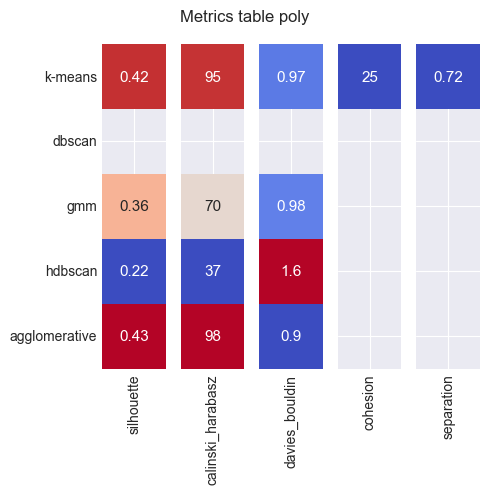

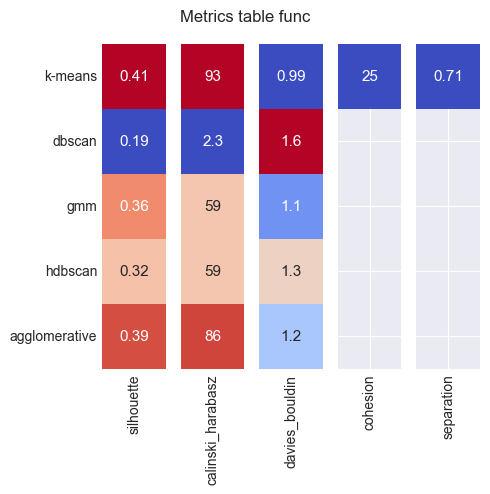

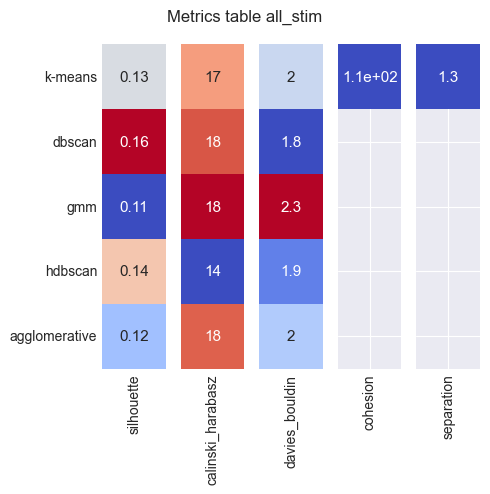

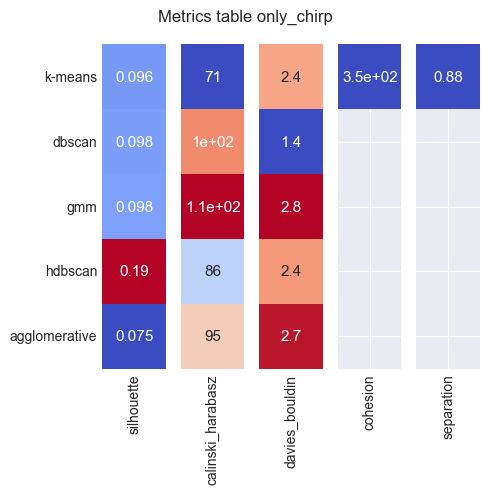

In [8]:
clustering_metrics = dict()

for df_name, data in dfs_norm.items():
    clustering_metrics[df_name] = dict()
    for model in clustering_models.keys():
        if len(set(clustering_pred[model][df_name])) == 1:
            clustering_metrics[df_name][model] = {
                "silhouette": None,
                "calinski_harabasz": None,
                "davies_bouldin": None,
            }
            continue
        if model in clustering_centroids.keys():
            clustering_metrics[df_name][model] = calculate_clustering_metrics(
                df=data, labels=clustering_pred[model][df_name], with_centroids=True
            )
        else:
            clustering_metrics[df_name][model] = calculate_clustering_metrics(
                df=data, labels=clustering_pred[model][df_name]
            )
    df_metrics = pd.DataFrame.from_dict(clustering_metrics[df_name])
    clustering_dict_table(
        title=f"Metrics table {df_name}",
        data=df_metrics.transpose(),
        **{"annot_kws": {"size": 11}},
    )

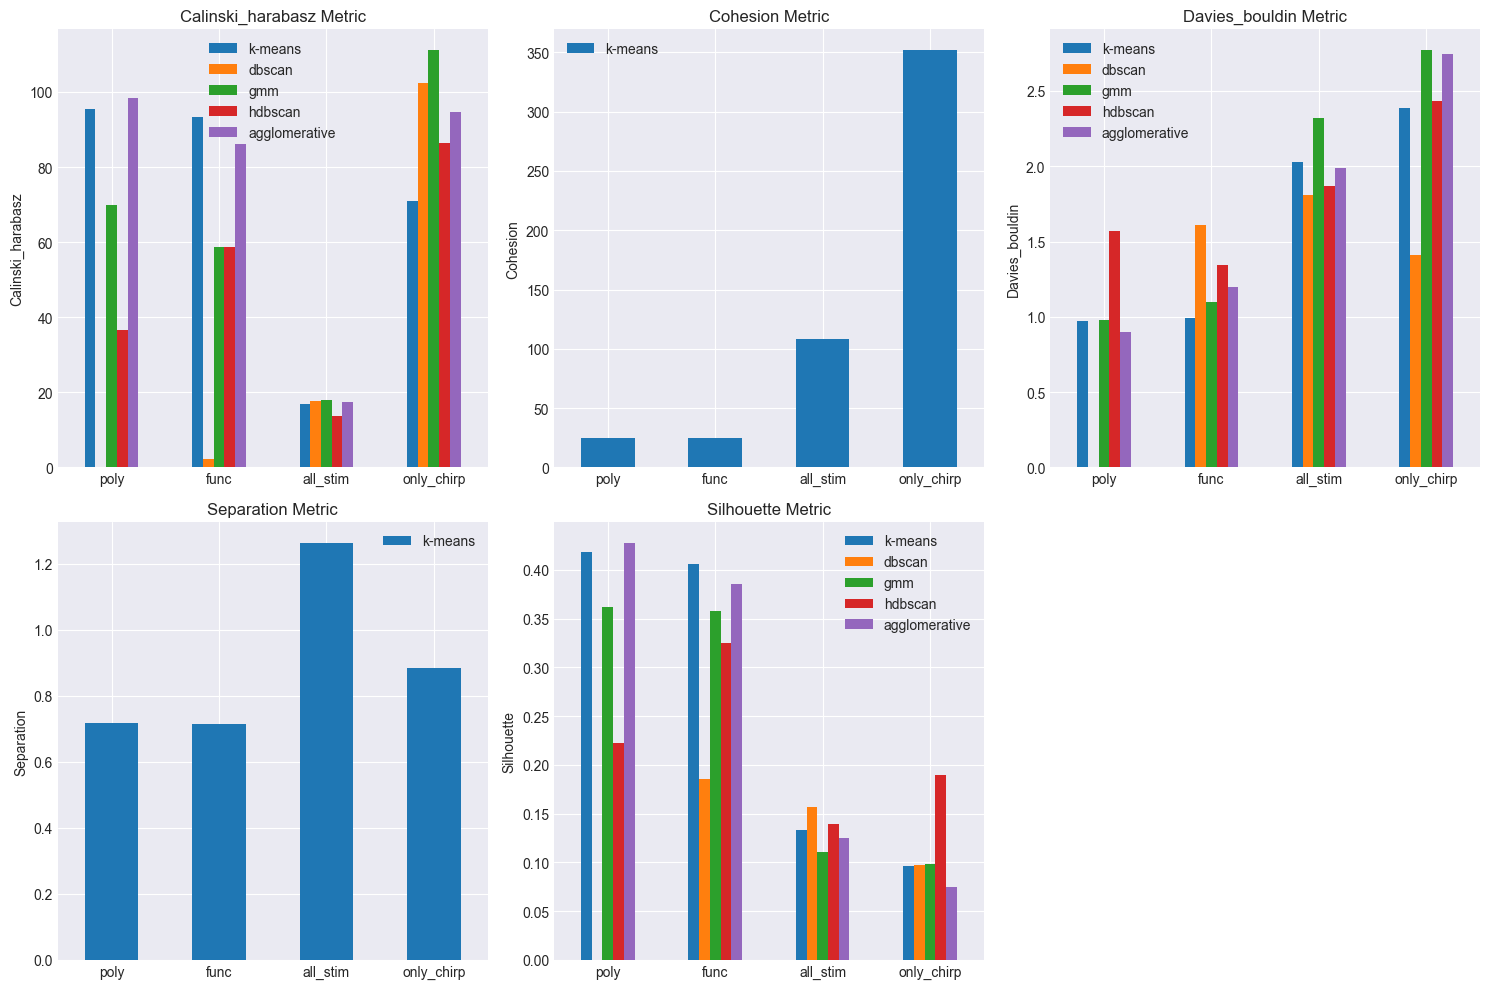

In [9]:
for df_name, data in clustering_metrics.items():
    for model, metrics in data.items():
        for metric, value in metrics.items():
            if value is None and metric not in ["cohesion", "separation"]:
                clustering_metrics[df_name][model][metric] = 0
plot_clustering_metrics(clustering_metrics)

## Selecting the Best Models
Now, it's time to select the best models for further analysis. This can be accomplished using a dictionary to choose the top-performing models. It's important to note that this section is interactive and requires user intervention. Additionally, it's essential to have reviewed the behavior and metrics of the clustering models to gain an overall understanding and select the most suitable models for continued analysis.

In [10]:
dfs_control_panel = {df: False for df in dfs_norm.keys()}
model_control_panel = {model: False for model in clustering_models.keys()}
clustering_control_panel = {
    df: model_control_panel.copy() for df in dfs_control_panel.keys()
}
manualSelection = False

### Model Selection

#### Selecting Data Frames

In [11]:
if manualSelection:
    for df_name in dfs_control_panel.keys():
        answer = input(f"Do you want to continue the analysis with {df_name} (y/n)").lower()
        while answer not in ["y", "n"]:
            answer = input("Please answer with y or n")
        if answer == "y":
            dfs_control_panel[df_name] = True

#### Selecting Models

In [12]:
if manualSelection:
    for df_name, df_bool in dfs_control_panel.items():
        if df_bool:
            for model in clustering_control_panel[df_name].keys():
                answer = input(
                    f"Do you want to continue the analysis with {df_name}-{model} (y/n)"
                ).lower()
                while answer not in ["y", "n"]:
                    answer = input("Please answer with y or n")
                if answer == "y":
                    clustering_control_panel[df_name][model] = True

### Normal Selection

In [13]:
if not manualSelection:
    clustering_control_panel = {
        "all_stim": {
            "agglomerative": True,
            "dbscan": False,
            "gmm": False,
            "hdbscan": False,
            "k-means": False
        },
        "func": {
            "agglomerative": False,
            "dbscan": False,
            "gmm": False,
            "hdbscan": False,
            "k-means": True
        },
        "only_chirp": {
            "agglomerative": True,
            "dbscan": False,
            "gmm": False,
            "hdbscan": False,
            "k-means": True
        },
        "poly": {
            "agglomerative": False,
            "dbscan": False,
            "gmm": False,
            "hdbscan": False,
            "k-means": True
        }
    }

### Exporting Control Panel

In [14]:
save_yaml(clustering_control_panel, "../../" + "config/clustering_control_panel.yml")

___